# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [3]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# Import data.
education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()


## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [6]:
# First 10 rows of the data
print(education_districtwise.head(10))


      DISTNAME STATNAME  BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT  OVERALL_LI
0   DISTRICT32   STATE1      13       391       104    875564.0       66.92
1  DISTRICT649   STATE1      18       678       144   1015503.0       66.93
2  DISTRICT229   STATE1       8        94        65   1269751.0       71.21
3  DISTRICT259   STATE1      13       523       104    735753.0       57.98
4  DISTRICT486   STATE1       8       359        64    570060.0       65.00
5  DISTRICT323   STATE1      12       523        96   1070144.0       64.32
6  DISTRICT114   STATE1       6       110        49    147104.0       80.48
7  DISTRICT438   STATE1       7       134        54    143388.0       74.49
8  DISTRICT610   STATE1      10       388        80    409576.0       65.97
9  DISTRICT476   STATE1      11       361        86    555357.0       69.90


### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [7]:
# Code Here
# Generate descriptive statistics for all columns
descriptive_stats = education_districtwise.describe(include='all')

# Display the table
print(descriptive_stats)


          DISTNAME STATNAME      BLOCKS     VILLAGES    CLUSTERS  \
count          634      634  634.000000   634.000000  634.000000   
unique         634       36         NaN          NaN         NaN   
top     DISTRICT32  STATE21         NaN          NaN         NaN   
freq             1       71         NaN          NaN         NaN   
mean           NaN      NaN   11.118297   899.619874  124.610410   
std            NaN      NaN    9.799581   632.473675   95.821688   
min            NaN      NaN    1.000000     6.000000    1.000000   
25%            NaN      NaN    6.000000   396.750000   60.000000   
50%            NaN      NaN    8.000000   816.500000  105.000000   
75%            NaN      NaN   13.000000  1231.500000  167.000000   
max            NaN      NaN   66.000000  3963.000000  592.000000   

          TOTPOPULAT  OVERALL_LI  
count   6.340000e+02  634.000000  
unique           NaN         NaN  
top              NaN         NaN  
freq             NaN         NaN  
mean    

**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A:

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

A:

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [13]:
# Code Here

sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data 
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1



74.22359999999999

## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [15]:
# Code Here
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=56810).mean()
estimate2

74.2478

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [16]:
# Code Here
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A:

**Question:** What does `random_state` do?

A:

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [17]:
# Code Here
estimate_df.head(10)

,estimate
0,73.7538
1,73.9188
2,71.0672
3,71.8020
4,74.0200
5,73.9030
6,72.4904
7,71.5668
8,77.4378
9,73.4862


You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A:

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [18]:
# Code Here
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

73.40914458

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [21]:
# Code Here
import pandas as pd
import numpy as np

# Example: Generate a list of 10,000 random estimates (you can replace this with your actual estimates)
estimates = np.random.uniform(low=0, high=100, size=10000)  # 10,000 random values between 0 and 100

# Create a new DataFrame using the list of estimates
estimate_df = pd.DataFrame(estimates, columns=['estimate'])

# Display the first few rows of the new DataFrame
print(estimate_df.head())


    estimate
0  30.054772
1  84.071429
2  27.346471
3  31.729653
4  58.985370


### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [22]:
# Code Here
import numpy as np

# Generate 10,000 random samples from a normal distribution
random_samples = np.random.normal(loc=0, scale=1, size=(10000, 100))

# Compute the mean of each sample
sample_means = np.mean(random_samples, axis=1)

# Compute the mean of the sampling distribution
mean_sample_means = np.mean(sample_means)

print("Mean of the sampling distribution:", mean_sample_means)


Mean of the sampling distribution: 0.0005142283466221861


**Question:** What is the mean for the sampling distribution of 10,000 random samples?

In [23]:
# Code Here
73.39518927444796

73.39518927444796

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

In [27]:
# Code Here
plt.show()


### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [25]:
# Code Here
import math

data = [10, 12, 23, 23, 16, 23, 21, 16]
mean = sum(data) / len(data)
variance = sum((x - mean) ** 2 for x in data) / (len(data) - 1)
standard_deviation = math.sqrt(variance)
standard_error = standard_deviation / math.sqrt(len(data))
print("Standard Error:", standard_error)


Standard Error: 1.8516401995451026


## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

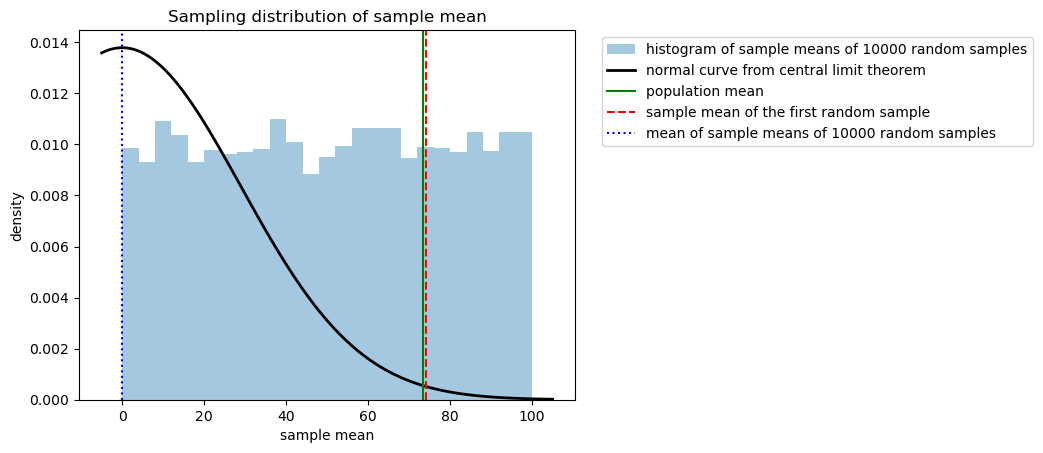

In [26]:
# Code Here
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

**Question:** What insights did you gain from the preceding sampling distribution?

A:

# Considerations

**What are some key takeaways that you learned from this project?**

A:

**What findings would you share with others?**

A:

**What would you convey to external readers?**

A: